In [1]:
import sys, logging
import cyberbattle.simulation.model as model
import cyberbattle.simulation.commandcontrol as commandcontrol
import cyberbattle.samples.privilege_escalation.privilege_escalation_example as ctf
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)s: %(message)s")

import plotly.offline as plo
plo.init_notebook_mode(connected=True)

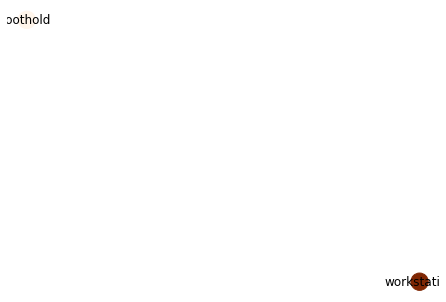

In [2]:
network = model.create_network(ctf.nodes)
env = model.Environment(network=network, vulnerability_library=dict([]),identifiers=ctf.ENV_IDENTIFIERS)
env.plot_environment_graph()

In [3]:
c2 = commandcontrol.CommandControl(env)
dbg = commandcontrol.EnvironmentDebugging(c2)

# 1 - Start from foothold
dbg.plot_discovered_network()
c2.print_all_attacks()

,status,properties,local_attacks,remote_attacks
id,,,,
foothold,owned,[],[RevealWorkstationAndDummyCredential],[]


leak workstation id and dummy credential from foothold

In [4]:
reveal_workstation = c2.run_attack('foothold','RevealWorkstationAndDummyCredential')
dbg.plot_discovered_network()
c2.print_all_attacks()
c2.total_reward()

INFO: discovered node: workstation
INFO: discovered credential: CachedCredential(node='workstation', port='SSH', credential='dummy_cred')
INFO: GOT REWARD: workstation revealed


,status,properties,local_attacks,remote_attacks
id,,,,
foothold,owned,[],[RevealWorkstationAndDummyCredential],[]
workstation,discovered,NaN,None,[AdminEscalationVulnerability]


9.0

exploit remote vulnerability on workstation from foothold to gain admin access

In [5]:
escalate_to_own_workstation = c2.run_remote_attack('foothold','workstation','AdminEscalationVulnerability')
dbg.plot_discovered_network()
c2.print_all_attacks()
c2.total_reward()

INFO: GOT REWARD: workstation admin privilege gained


,status,properties,local_attacks,remote_attacks
id,,,,
foothold,owned,[],[RevealWorkstationAndDummyCredential],[]
workstation,owned,"[placeholder, privilege_2]",[],[AdminEscalationVulnerability]


15.0

double check that the environment plot is correct

compare accumulated reward to potential reward

In [6]:
print(f'workstation is owned: {env.get_node("workstation").agent_installed}')
print(f'total reward: {c2.total_reward()} summed node values: {sum([env.get_node(node_id).value for node_id,_ in env.nodes()])}')

workstation is owned: True
total reward: 15.0 summed node values: 100
